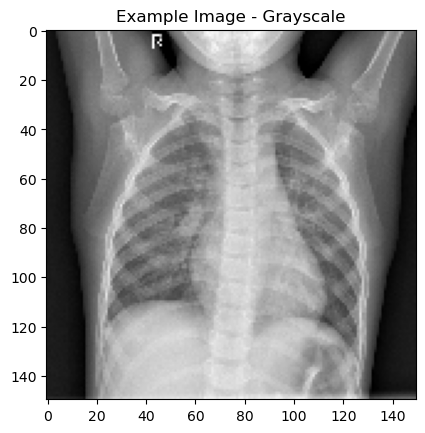

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directories for the dataset
base_dir = 'chest_xray/'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Function to load and convert images to grayscale
def load_and_convert_to_grayscale(image_dir):
    images = []
    labels = []
    for label in ['NORMAL', 'PNEUMONIA']:
        folder_path = os.path.join(image_dir, label)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            img = cv2.resize(img, (150, 150))  # Resize to 150x150
            images.append(img)
            labels.append(0 if label == 'NORMAL' else 1)
    return np.array(images), np.array(labels)

# Load the data
train_images, train_labels = load_and_convert_to_grayscale(train_dir)
val_images, val_labels = load_and_convert_to_grayscale(val_dir)
test_images, test_labels = load_and_convert_to_grayscale(test_dir)

# Display example image
plt.imshow(train_images[0], cmap='gray')
plt.title('Example Image - Grayscale')
plt.show()


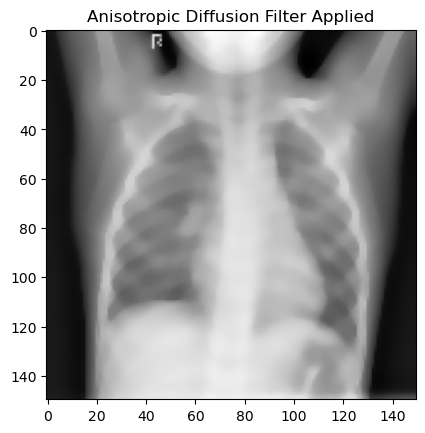

In [2]:
import cv2
from skimage.restoration import denoise_tv_chambolle

def anisotropic_diffusion(image):
    return denoise_tv_chambolle(image, weight=0.1)

# Apply on a sample image
filtered_image = anisotropic_diffusion(train_images[0])
plt.imshow(filtered_image, cmap='gray')
plt.title('Anisotropic Diffusion Filter Applied')
plt.show()


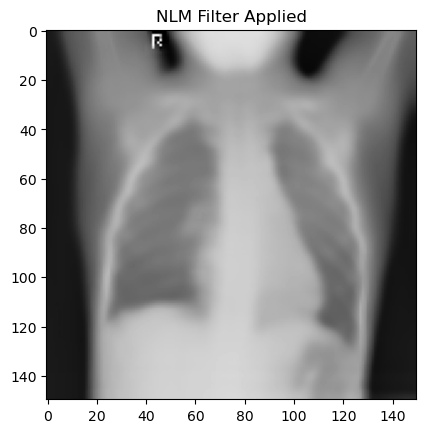

In [3]:
def nlm_filter(image):
    return cv2.fastNlMeansDenoising(image, None, 30, 7, 21)

# Apply on a sample image
filtered_image = nlm_filter(train_images[0])
plt.imshow(filtered_image, cmap='gray')
plt.title('NLM Filter Applied')
plt.show()


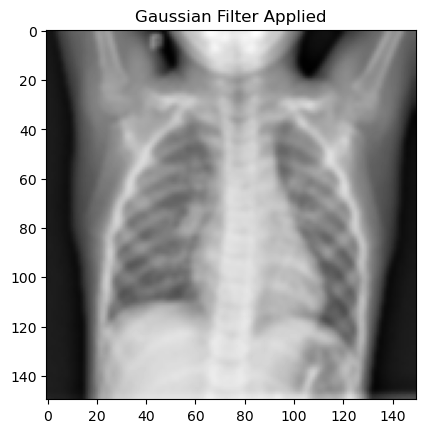

In [4]:
def gaussian_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Apply on a sample image
filtered_image = gaussian_filter(train_images[0])
plt.imshow(filtered_image, cmap='gray')
plt.title('Gaussian Filter Applied')
plt.show()


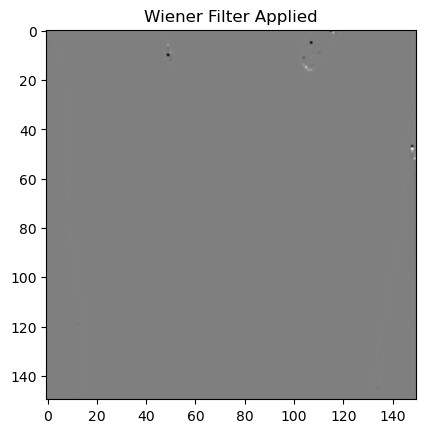

In [5]:
from scipy.signal import wiener

def wiener_filter(image):
    return wiener(image, (5, 5))

# Apply on a sample image
filtered_image = wiener_filter(train_images[0])
plt.imshow(filtered_image, cmap='gray')
plt.title('Wiener Filter Applied')
plt.show()


In [6]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import math

# Define the function to calculate MSE, PSNR, and SSIM
def calculate_metrics(original_image, filtered_image):
    # Calculate MSE
    mse_value = mean_squared_error(original_image, filtered_image)
    
    # Calculate PSNR
    psnr_value = 20 * math.log10(255.0 / math.sqrt(mse_value))
    
    # Calculate SSIM (use data_range to specify the range of pixel values)
    ssim_value = ssim(original_image, filtered_image, data_range=original_image.max() - original_image.min())
    
    return mse_value, psnr_value, ssim_value

# Compare each filter
original_image = train_images[0]

filters = {
    'Anisotropic': anisotropic_diffusion,
    'NLM': nlm_filter,
    'Gaussian': gaussian_filter,
    'Wiener': wiener_filter
}

for filter_name, filter_func in filters.items():
    # Apply the filter
    filtered_image = filter_func(original_image)
    
    # Calculate metrics
    mse_value, psnr_value, ssim_value = calculate_metrics(original_image, filtered_image)
    
    # Print the results
    print(f"Filter: {filter_name} -> MSE: {mse_value}, PSNR: {psnr_value}, SSIM: {ssim_value}")


Filter: Anisotropic -> MSE: 20311.53127077657, PSNR: 5.053376951007124, SSIM: 0.0036858036515471752
Filter: NLM -> MSE: 137.14208888888888, PSNR: 26.75909600702761, SSIM: 0.7057982182447313
Filter: Gaussian -> MSE: 63.726844444444446, PSNR: 30.0875794677051, SSIM: 0.895772843044182
Filter: Wiener -> MSE: 12552544.97913261, PSNR: -22.856514253747772, SSIM: 0.5779202502060279


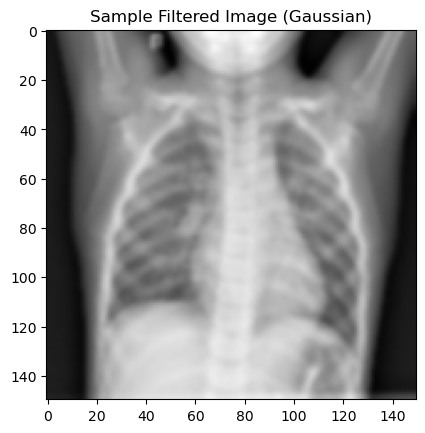

In [7]:
def apply_gaussian_filter(images):
    filtered_images = []
    for img in images:
        filtered_img = cv2.GaussianBlur(img, (5, 5), 0)
        filtered_images.append(filtered_img)
    return np.array(filtered_images)

# Apply Gaussian filter to the train, validation, and test datasets
filtered_train_images = apply_gaussian_filter(train_images)
filtered_val_images = apply_gaussian_filter(val_images)
filtered_test_images = apply_gaussian_filter(test_images)

# Display a sample filtered image
plt.imshow(filtered_train_images[0], cmap='gray')
plt.title('Sample Filtered Image (Gaussian)')
plt.show()


In [8]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
import math

# Function to calculate metrics
def calculate_metrics(original_image, filtered_image):
    mse_value = mean_squared_error(original_image, filtered_image)
    psnr_value = 20 * math.log10(255.0 / math.sqrt(mse_value))
    ssim_value = ssim(original_image, filtered_image)
    return mse_value, psnr_value, ssim_value

# Example: Compare the original and filtered images for a sample image
sample_index = 0  # You can change this index to check other images
original_image = train_images[sample_index]
filtered_image = filtered_train_images[sample_index]

# Calculate MSE, PSNR, SSIM for the Gaussian filtered image
mse_value, psnr_value, ssim_value = calculate_metrics(original_image, filtered_image)
print(f"Gaussian Filter -> MSE: {mse_value}, PSNR: {psnr_value}, SSIM: {ssim_value}")


Gaussian Filter -> MSE: 63.726844444444446, PSNR: 30.0875794677051, SSIM: 0.895772843044182


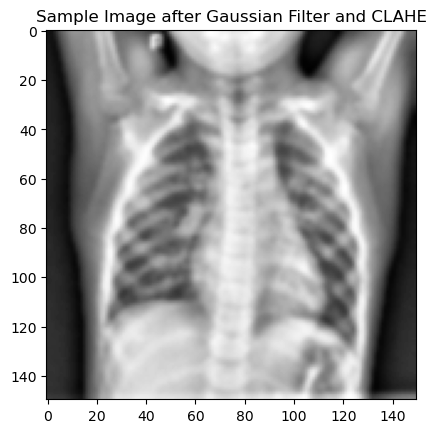

In [9]:
def apply_clahe(images):
    clahe_images = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    for img in images:
        clahe_img = clahe.apply(img)
        clahe_images.append(clahe_img)
    return np.array(clahe_images)

# Apply CLAHE to the filtered images
clahe_train_images = apply_clahe(filtered_train_images)
clahe_val_images = apply_clahe(filtered_val_images)
clahe_test_images = apply_clahe(filtered_test_images)

# Display a sample CLAHE applied image
plt.imshow(clahe_train_images[0], cmap='gray')
plt.title('Sample Image after Gaussian Filter and CLAHE')
plt.show()


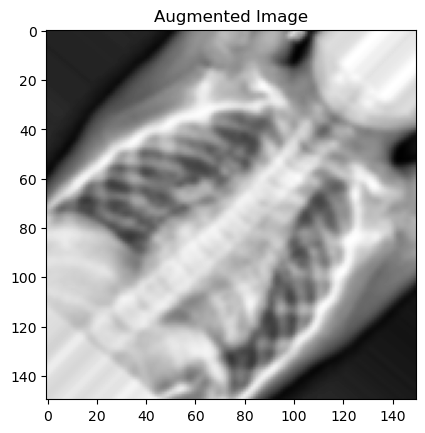

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Define the augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

# Apply augmentation to the filtered and CLAHE-processed images
# Assuming img is a single grayscale image (2D) that has been processed with CLAHE
img = clahe_train_images[0]

# Add a batch dimension (expand to 4D) and channels dimension
img = np.expand_dims(img, axis=(0, -1))  # Adding both batch and channel dimensions

# Generate augmented image
aug_iter = train_datagen.flow(img)
aug_image = next(aug_iter)[0]

# Display the augmented image
plt.imshow(aug_image.squeeze(), cmap='gray')
plt.title('Augmented Image')
plt.show()


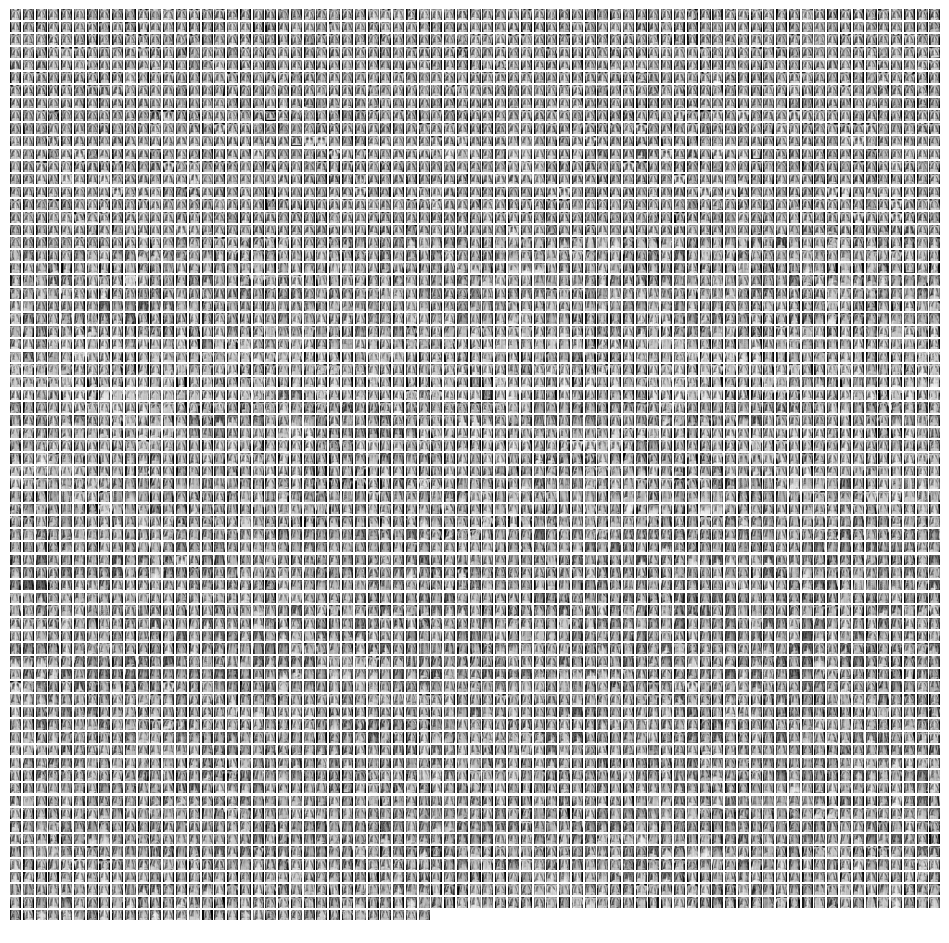

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clahe_train_images is a list or array of images (grayscale)
num_images = len(clahe_train_images)

# Determine the grid size for displaying the images
grid_size = int(np.ceil(np.sqrt(num_images)))  # Square grid

# Create a figure with subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))

# Iterate over the images and plot each one
for i, ax in enumerate(axes.flat):
    if i < num_images:
        # Get the ith CLAHE image
        img = clahe_train_images[i]
        
        # Display the image
        ax.imshow(img, cmap='gray')
        
    # Remove axes for unused subplots
    ax.axis('off')

# Adjust layout (manually adjusted spacing instead of tight_layout)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()


In [11]:
import cv2
import numpy as np
from scipy.stats import skew, kurtosis

# Function to extract statistical features
def extract_statistical_features(image):
    # Flatten the image to 1D array
    flat_image = image.flatten()
    
    # Mean
    mean_val = np.mean(flat_image)
    
    # Variance
    variance_val = np.var(flat_image)
    
    # Skewness
    skewness_val = skew(flat_image)
    
    # Kurtosis
    kurtosis_val = kurtosis(flat_image)
    
    return [mean_val, variance_val, skewness_val, kurtosis_val]

# Example: Extract statistical features from Gaussian filtered images
statistical_features = []
for img in filtered_train_images:
    features = extract_statistical_features(img)
    statistical_features.append(features)

print(f"Sample statistical features: {statistical_features[0]}")


Sample statistical features: [128.77604444444444, 3716.4299772424692, -0.48655320263526464, -0.7865885769342791]


In [15]:
!pip install mahotas



  Obtaining dependency information for mahotas from https://files.pythonhosted.org/packages/e0/0c/3710525e4d3a2cb28852cb77878d8268e3e56c52cdb4018972685a11e6cd/mahotas-1.4.18-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 435.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.7 MB 939.4 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.7 MB 1.7 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.7 MB 2.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.9/1.7 MB 3.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 3.5 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 3.5 MB/s eta 0:00:01
   ------------------------ --------------- 1.1/1.7 MB 2.7 MB/s eta 0:00:01
   -------------------------------- -----

In [16]:
import mahotas

# Function to extract texture features using Mahotas GLCM
def extract_glcm_features_mahotas(image):
    # Calculate GLCM using Mahotas
    glcm = mahotas.features.haralick(image)
    
    # Extract the mean of Haralick features (texture features)
    mean_features = glcm.mean(axis=0)
    
    return mean_features

# Example: Extract GLCM features from Gaussian filtered images
texture_features = []
for img in filtered_train_images:
    features = extract_glcm_features_mahotas(img)
    texture_features.append(features)

print(f"Sample texture features (Mahotas): {texture_features[0]}")


Sample texture features (Mahotas): [ 5.28000610e-04  5.90535768e+01  9.91945545e-01  3.67298374e+03
  2.45437847e-01  2.58441264e+02  1.46328814e+04  8.56247584e+00
  1.18739620e+01  3.73348645e-04  3.88162201e+00 -4.34089488e-01
  9.99147418e-01]


In [17]:
def extract_edge_features(image):
    # Apply Sobel filter to detect edges
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # X-axis
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Y-axis
    
    # Combine the edge information
    sobel_combined = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    
    # Sum and standard deviation of edge intensity values
    edge_sum = np.sum(sobel_combined)
    edge_std = np.std(sobel_combined)
    
    return [edge_sum, edge_std]

# Example: Extract edge features from Gaussian filtered images
edge_features = []
for img in filtered_train_images:
    features = extract_edge_features(img)
    edge_features.append(features)

print(f"Sample edge features: {edge_features[0]}")


Sample edge features: [17526971.8758625, 636.5074510521371]


In [18]:
from skimage.feature import hog

# Function to extract HOG features
def extract_hog_features(image):
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    return features

# Example: Extract HOG features from Gaussian filtered images
hog_features = []
for img in filtered_train_images:
    features = extract_hog_features(img)
    hog_features.append(features)

print(f"Sample HOG features: {hog_features[0][:10]}")  # Print the first 10 HOG features


Sample HOG features: [0.24767154 0.         0.         0.         0.01125249 0.
 0.         0.00419356 0.45489302 0.1500332 ]


In [23]:
# Example: Concatenate all features for a single image
def extract_all_features(image):
    statistical = extract_statistical_features(image)
    texture = extract_glcm_features_mahotas(image)
    edge = extract_edge_features(image)
    hog = extract_hog_features(image)
    
    # Concatenate all features into a single array
    return np.concatenate([statistical, texture, edge, hog])

# Extract features for all images in the dataset
all_features = []
for img in filtered_train_images:
    features = extract_all_features(img)
    all_features.append(features)

all_features = np.array(all_features)
print(f"Feature shape: {all_features.shape}")


Feature shape: (5216, 10423)


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(all_features, train_labels, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"SVM Accuracy: {accuracy}")


NameError: name 'all_features' is not defined